# Librairies

### Import usefull librairies

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import tree
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import RFE

import random

from sklearn import svm 
from sklearn.svm import SVC




# Explore The Dataset

### Load the dataset

In [5]:
creditcard = pd.read_csv('creditcard.csv')
creditcard.head()       

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It seems we only have numerical data, we will have a look of the types of our data

In [6]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

We have only numerical data, so that no need to change any types. Do we have any missing value?

In [8]:
null_cols = creditcard.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

We don't have any missing value. Let's display the heatmap to check if feature are colinear

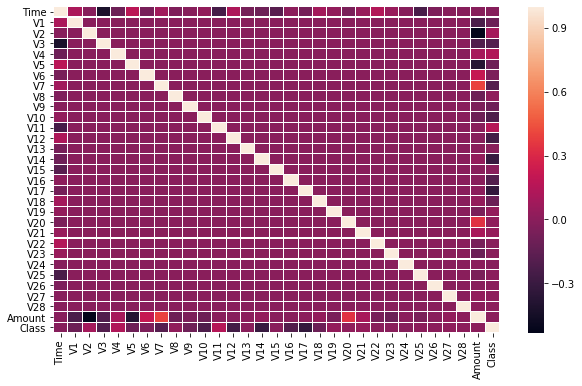

In [5]:
corr = creditcard.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,linewidths=.1)

# Split data to have train and test

We split data to have 20% for test and 80 for train. We want to predict the Class (it is fraudulous or not)

In [6]:
len(creditcard)

284807

In [172]:
df = creditcard
X = df.drop('Class', axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [173]:
y_train.Class.value_counts()

0    227459
1       386
Name: Class, dtype: int64

# Model selection

## Logistic Regression

On crée un model logistic, on fit le model sur nos données, et on predit le y

In [250]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log_model = log_model.predict(X_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print("Training:", log_model.score(X_train, y_pred_log_model))

Training: 1.0


On a un score de 1: Il y a donc un probleme (soit le target est dans le dataset, soit les classes sont mal-reparties

On va regarder certaines metrics

In [91]:
print("Accuracy Training:", accuracy_score(y_train, y_pred))

Accuracy Training: 0.9995567161886371


On a un Accuracy très bon (trop elevé) 
Accuracy (ACC) = ΣTP + ΣTN / Σ Total 

On affiche la matrice de confusion pour voir la repartition

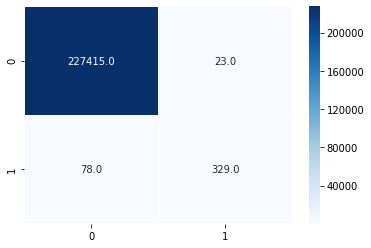

In [92]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

En effet l'Accuracy est bien calculé et très elevé, mal representative

In [94]:
(227415 + 329) /  (227415 + 23 + 78 + 329)

0.9995567161886371

Essayons la Balance accuracy pour prendre en compte le déséquilibrage des classes

In [95]:
print("Balance accuracy Training:", balanced_accuracy_score(y_train, y_pred))

Balance accuracy Training: 0.9041263409464853


La balance accuracy n'est pas non plus representative BA = (TP/P + TN/N ) 2

In [98]:
((227415 / (227415 + 23)) + (329 / (329 + 78)) ) / 2

0.9041263409464853

On calcule le recall

In [99]:
print("Recall Training:", recall_score(y_train, y_pred))

Recall Training: 0.8083538083538083


Le recall traduit le nombre de fraude, bien prédit sur les elements en effet en fraude TPR = TP/(TP+FN)

On calcule la precision

In [100]:
print("Recall Training:", precision_score(y_train, y_pred))

Recall Training: 0.9346590909090909


La precision traduit le nombre de fraude bien predit par rapport a toutes les predictions PPV = TP/(TP + FP)

On prend donc une combinaison des 2: le f1-score F1 = 2 ((PPV*TPR)(PPV + TPR))

De plus comme notre dataSet est très déséquilibré, on decide donc de faire de la cross validation avec 10 set de data avec les meilleurs params repérer par GridSearch

In [251]:
# use a full grid over all parameters
param_grid = {"fit_intercept": [True, False],
                "random_state": [2, 20, 100]}

cv_lr_f1 = GridSearchCV(LogisticRegression(), param_grid, cv=10,scoring='f1')
cv_lr_f1.fit(X_train, y_train)



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'random_state': [2, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [252]:
print(cv_lr_f1.best_params_)
print(cv_lr_f1.best_score_)

{'fit_intercept': True, 'random_state': 2}
0.6555863306679601


## RandomForestModel

On essaie le random forest, toujours en cross validation, avec les meilleurs parametre

In [255]:
param_grid = {"max_depth": [2, 50],
              "criterion": ["gini", "entropy"]}

cv_rf_f1 = GridSearchCV(RandomForestClassifier(), param_grid, cv=10,scoring='f1')
cv_rf_f1.fit(X_train, y_train)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [256]:
print(cv_rf_f1.best_params_)
print(cv_rf_f1.best_score_)

{'criterion': 'entropy', 'max_depth': 50}
0.8456071249026984


Random forest model is even better then linear and logistic regression

## GradientBoostingClassifier

In [266]:
cv_b_f1 = cross_val_score(BaggingClassifier(),X_train, y_train, cv=10, scoring="f1")
cv_b_f1.mean()

#param_grid = {"n_estimators": [2, 50],
#              "learning_rate": [0.1, 1.6],
#              "max_depth": [5, 50]}

#cv_gb_f1 = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10,scoring='f1')
#cv_gb_f1.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.8528612157407075

In [ ]:
#print(cv_gb_f1.best_params_)
#print(cv_gb_f1.best_score_)

## BaggingClassifier

In [265]:
cv_b_f1 = cross_val_score(BaggingClassifier(),X_train, y_train, cv=10, scoring="f1")
cv_b_f1.mean()


#param_grid = {"n_estimators": [2, 20, 100],
#              "verbose": [5, 10],
#              "random_state": [2, 5]}

#cv_b_f1 = GridSearchCV(BaggingClassifier(), param_grid, cv=10,scoring='f1')
#cv_b_f1.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.8542370106431504

In [ ]:
#print(cv_b_f1.best_params_)
#print(cv_b_f1.best_score_)

## DecisionTree

In [259]:
cv_dt_f1 = cross_val_score(tree.DecisionTreeClassifier(),X_train, y_train, cv=10, scoring="f1")
cv_dt_f1.mean()

#Ajouter le grid search
#param_grid = {"min_samples_split": [2, 20, 100],
#              "max_depth": [1, 3, 10],
#              "max_features": [2, 3, 10],
#              "random_state": [2, 5, 10]}

#cv_dt_f1 = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=10,scoring='f1')
#cv_dt_f1.fit(X_train, y_train)

0.7788809469152083

In [ ]:
#print(cv_dt_f1.best_params_)
#print(cv_dt_f1.best_score_)

## Naive Bayes

In [263]:
cv_nb_f1 = cross_val_score(GaussianNB(),X_train, y_train, cv=10, scoring="f1")
cv_nb_f1.mean()

#Ajouter le grid search
#param_grid = {"var_smoothing": [0.2, 2.6, 10.4]}

#cv_nb_f1 = GridSearchCV(GaussianNB(), param_grid, cv=10,scoring='f1')
#cv_nb_f1.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.2315326499146313

In [267]:
#print(cv_nb_f1.best_params_)
#print(cv_nb_f1.best_score_)

# Choose your model, train it on train dataset then on test dataset

We choose the model which the best score: RandomForestClassifier

In [223]:
clf_vf = RandomForestClassifier() #mettre les hyper params trouvé via grid Search
clf_vf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
y_train_pred = clf_vf_train.predict(X_train)

In [225]:
print("Training F1 score:", f1_score(y_test_pred, y_test))

Training F1 score: 0.8617021276595745


In [226]:
y_test_pred = clf_vf.predict(X_test)

In [227]:
print("Testing F1 score:", f1_score(y_test_pred, y_test))

Testing F1 score: 0.6210526315789474


# Predict data

Take a random column

In [214]:
random_number = random.randint(0,len(df))
random_col = pd.DataFrame(df.iloc[random_number]).T.drop("Class", axis=1)

Predict if the transaction is fraudulous

In [28]:
clf.predict(random_col)

array([0])

Catch the row and find if your prediction is good

In [29]:
df.iloc[random_number].Class

0.0

# Visualise with ROC

In [228]:
x_min = 0
x_max = len(df)

In [229]:
f1_score(y_test_pred, y_test)

0.6210526315789474

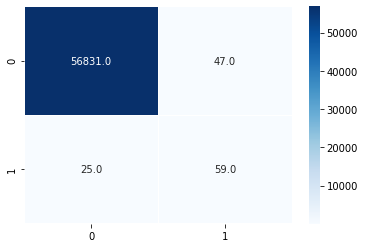

In [230]:
sns.heatmap(confusion_matrix(y_test_pred, y_test), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

In [231]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test_pred, y_test)

(array([0.99956029, 0.55660377]),
 array([0.99917367, 0.70238095]),
 array([0.99936694, 0.62105263]),
 array([56878,    84]))

In [232]:
precision_score(y_train_pred, y_train)

0.9533678756476683

In [233]:
recall_score(y_train_pred, y_train)

1.0

In [234]:
(75/80 + 56865/56882)/2

0.9686005678421996

On trace la courbe de ROC

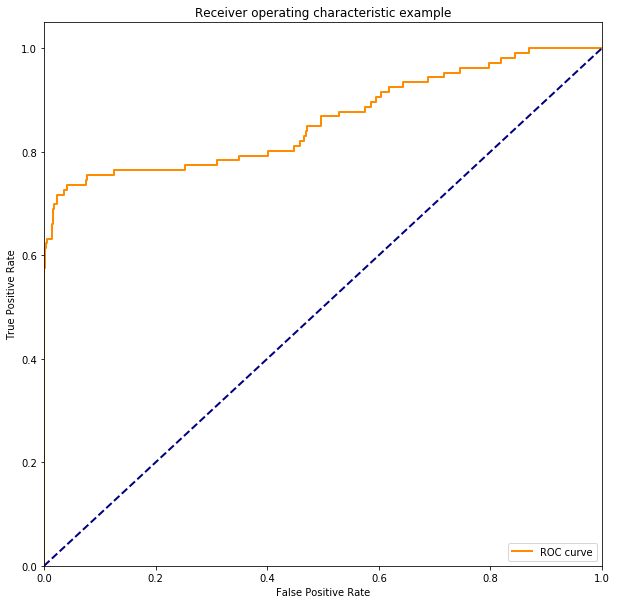

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, clf_vf.predict_proba(X_test)[:, 1])


plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

On trace les probabilités 

In [240]:
pd.DataFrame(clf_vf.predict_proba(X_test)).sort_values(0)

,0,1
3438,1.014744e-13,1.000000e+00
35325,4.378720e-13,1.000000e+00
7311,1.798339e-12,1.000000e+00
49059,3.022693e-12,1.000000e+00
55722,5.639489e-12,1.000000e+00
33822,5.992984e-12,1.000000e+00
38987,1.794342e-11,1.000000e+00
56739,1.618481e-10,1.000000e+00
4268,2.448868e-10,1.000000e+00
15156,3.641876e-10,1.000000e+00


In [203]:
len([x==0 for x in clf_vf.predict(X_test)])


56962

In [249]:
X_test.shape
clf_vf.predict_proba(X_test).shape

clf_vf.predict_proba(X_test)[:,1] + clf_vf.predict_proba(X_test)[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

[0.99599428]
[0.00400572]
[[0.99599428 0.00400572]]


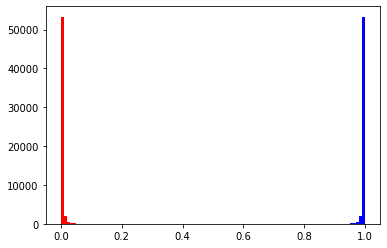

In [243]:
prob_0 = clf_vf.predict_proba(X_test)[:,0]
prob_1 = clf_vf.predict_proba(X_test)[:,1]

print(prob_0[:1])
print(prob_1[:1])
print(clf_vf.predict_proba(X_test)[:1,])


#plt.xlim(0.2, 0.6)
plt.hist(prob_0, color='blue', bins=100)
plt.hist(prob_1, color='red', bins=100)
plt.show()

In [197]:
results = pd.DataFrame.from_dict({"fpr":fpr, "tpr":tpr, "thresholds":thresholds})
results
results[results.tpr > 0.90]

,fpr,tpr,thresholds
158,0.593675,0.905660,1.172990e-05
159,0.597633,0.905660,1.103912e-05
160,0.597668,0.905660,1.103427e-05
161,0.600288,0.905660,1.061458e-05
162,0.600288,0.915094,1.061284e-05
163,0.613708,0.915094,8.879227e-06
164,0.613743,0.915094,8.877280e-06
165,0.621887,0.915094,8.045716e-06
166,0.621887,0.924528,8.041432e-06
167,0.636327,0.924528,6.692563e-06


# Save the model

In [ ]:
credit_card_rf = open("creditcard.sav","wb")
pickle.dump(clf, credit_card_rf)
credit_card_rf.close()